In [1]:
import re
import numpy as np
import os
from tools import *

%matplotlib inline

In [2]:
features = np.loadtxt('/data/yulongc/apollo/data/percpt/features.out')
features = np.reshape(features,(8,512,512))

In [ ]:
# caffe model
import caffe

caffe.set_mode_gpu()

# model to attack
model_definition = 'tf_attack/deploy.prototxt'
model_weights = 'tf_attack/deploy.caffemodel'

# init net
net = caffe.Net(model_definition, model_weights, caffe.TEST)

# transform input
# input_feature = transform(feature_frames, 0)
input_feature = features
print input_feature.shape

# get output
net.blobs['data'].data[0] = input_feature
net.forward()
outputs = ['category_score','class_score','confidence_score',
#            'heading_pt',
           'height_pt','instance_pt']
for output in outputs:
    print output, net.blobs[output].data.shape, net.blobs[output].data.max(), net.blobs[output].data.min()
output_data = np.copy([net.blobs[output].data[0] for output in outputs])

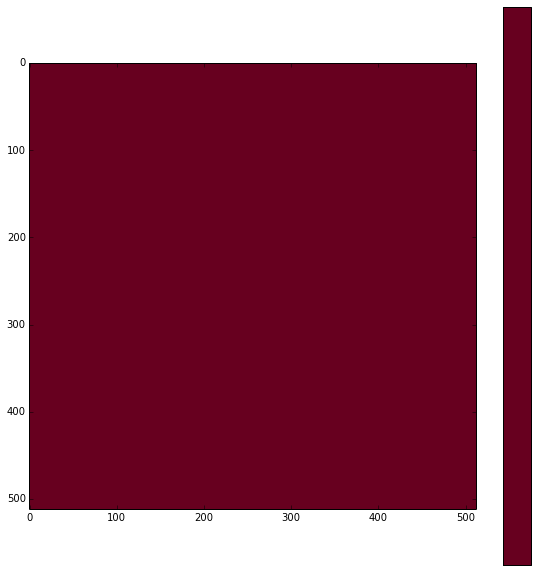

In [6]:
draw_feature(output_data[0][0])